In [8]:
library(tidyverse)
library(tidymodels)

In [9]:
#load data
heart_disease <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "number_of_major_vessels", "thal", "diagnosis_of_heart_disease")
heart_data <- heart_disease |> mutate(chest_pain_type = as_factor(chest_pain_type), fasting_blood_sugar = as_factor(fasting_blood_sugar)) |> select(age, sex, chest_pain_type, resting_blood_pressure, chol, fasting_blood_sugar, maximum_heart_rate_achieved)
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_blood_pressure,chol,fasting_blood_sugar,maximum_heart_rate_achieved
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
63,1,1,145,233,1,150
67,1,4,160,286,0,108
67,1,4,120,229,0,129
37,1,3,130,250,0,187
41,0,2,130,204,0,172
56,1,2,120,236,0,178
62,0,4,140,268,0,160
57,0,4,120,354,0,163
63,1,4,130,254,0,147


In [20]:
heart_disease

age,sex,chest_pain_type,resting_blood_pressure,chol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,diagnosis_of_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [10]:
#clean the data first
#the data is already clean, but we may need to filter to control for other factors like sex and fasting blood sugar- ASK
    #sex: 1 = male, 0 = female
    #fasting blood sugar: 1 = >120 mg/dl, 0 = <120

#chest pain types:
#Value 1: typical angina
#Value 2: atypical angina
#Value 3: non-anginal pain
#Value 4: asymptomatic

#let's say age between 40 years and 60 years
heart_male <- heart_data |> filter(sex == "1", fasting_blood_sugar == "0")

In [12]:
#now let's split it into training and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = chest_pain_type)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)
#do we want 75:25? or another split? ASK

Then, we need to SUMMARIZE (group and summarize?) our data in one table. An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [22]:
#Now we can summarize our data; let's find the number of observations for each "class" (risk of heart attack, high or low) and the average for each predictor

#there are a lot more type 4; would this skewer our model?? ASK
heart_summary <- heart_train |> group_by(chest_pain_type) |> summarize(number_of_observations = n(), average_bp = mean(resting_blood_pressure), average_chol = mean(chol), average_hr = mean(maximum_heart_rate_achieved))
heart_summary

#looking at the averages, we can see that some of the classes are similar, but for the most part, type 1 (typical angina) differs from type 2 (atypical angina) for all predictors; type 3 (non-angina) differs from the two for bp, but is similar in chol and hr
#we can disregard type 4, asymptomatic, because we want to predict chest pain type from symptoms/predictors (WHY? to see if there is a difference; if different symptoms lead to different types of pain, instead of saying that all chest pain is the same and have the same causes)

chest_pain_type,number_of_observations,average_bp,average_chol,average_hr
<fct>,<int>,<dbl>,<dbl>,<dbl>
1,21,141.9048,237.3333,154.9524
2,36,128.4722,247.5000,165.1389
3,63,131.1587,248.4127,154.5556
4,106,131.0849,250.9057,141.8113


In [ ]:
Now we can graph to show the distribution of our predictors (show that it is possible to classify using them)

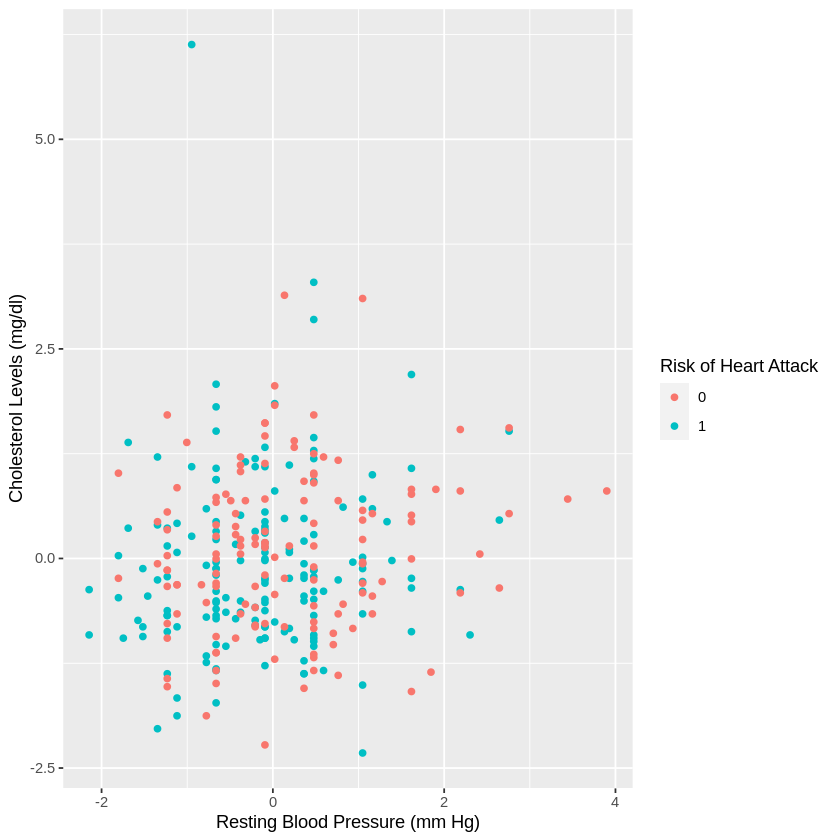

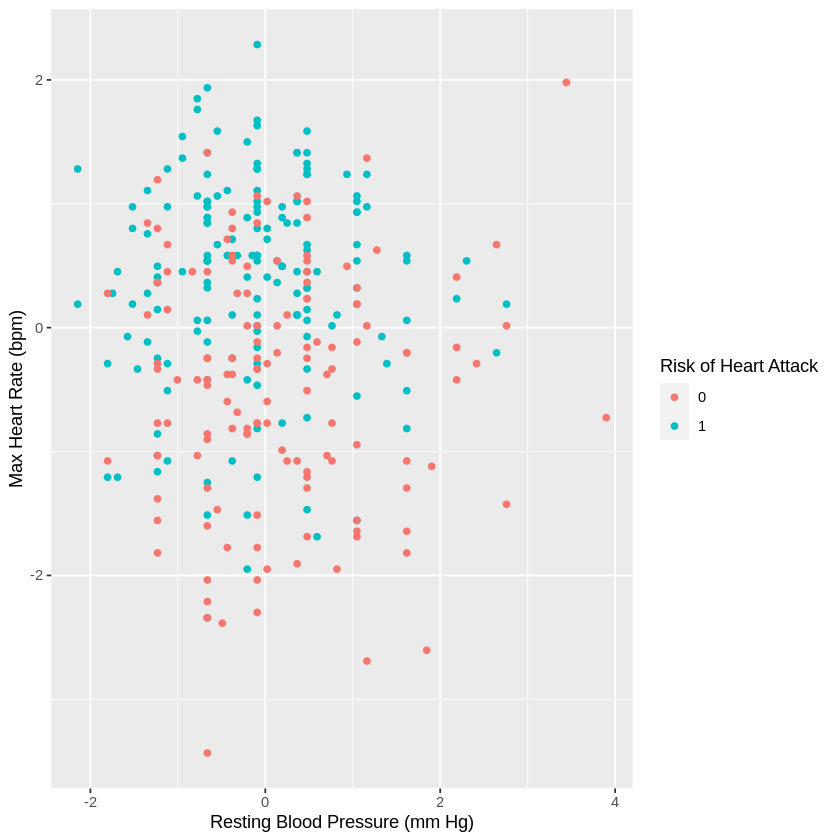

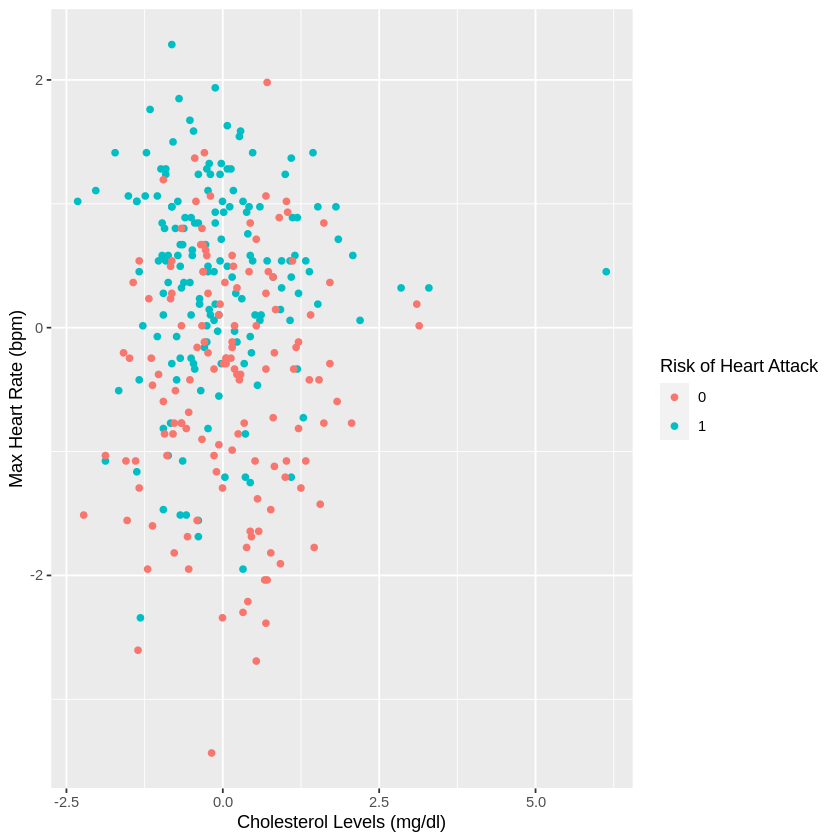

In [52]:
#first we need to standardize the data (ie. scale it so that the graph can be comparable)

heart_recipe <- recipe(risk ~ ., data = heart) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

heart_scaled <- heart_recipe |>                  
prep() |>  bake(heart)

#now we can plot the scaled data; since we have three predictors, we can plot 3 graphs (blood pressure with cholesterol levels OR with max heart rate, and cholesterol levels with max heart rate_
heart_plot1 <- ggplot(heart_scaled, aes(x= restbp, y = chol, colour = risk)) + geom_point() + labs(x = "Resting Blood Pressure (mm Hg)", y = "Cholesterol Levels (mg/dl)", colour = "Risk of Heart Attack")
heart_plot2 <- ggplot(heart_scaled, aes(x= restbp, y = maxhrate, colour = risk)) + geom_point() + labs(x = "Resting Blood Pressure (mm Hg)", y = "Max Heart Rate (bpm)", colour = "Risk of Heart Attack")
heart_plot3 <- ggplot(heart_scaled, aes(x= chol, y = maxhrate, colour = risk)) + geom_point() + labs(x = "Cholesterol Levels (mg/dl)", y = "Max Heart Rate (bpm)", colour = "Risk of Heart Attack")


heart_plot1
heart_plot2
heart_plot3
#from these graphs, we can see a little bit of a correlation with the predictors, max heart rate and cholesterol levels, but there isn't enough distinction. This tells us we need to filter our data